In [7]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [8]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One hot encoding the target variable
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Splitting the training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

100%|██████████| 74/74 [00:00<00:00, 1245.52it/s]


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 38, 38,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 38, 38,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 38, 38,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 38, 38,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 38, 38,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 38, 38,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,478 (27.35 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/50


/Users/andreoliveira/Documents/GitHub/Projeto-CAA-1/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.3150 - loss: 2.1650

45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.3170 - loss: 2.1547 - val_accuracy: 0.6667 - val_loss: 1.0224
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.5654 - loss: 1.1586

45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5658 - loss: 1.1578 - val_accuracy: 0.6695 - val_loss: 0.9247
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.6213 - loss: 1.0078

45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6217 - loss: 1.0068 - val_accuracy: 0.7175 - val_loss: 0.8230
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6722 - loss: 0.8678

45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6725 - loss: 0.8675 - val_accuracy: 0.7203 - val_loss: 0.7673
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6933 - loss: 0.7997  

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6934 - loss: 0.7995 - val_accuracy: 0.7373 - val_loss: 0.7384
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.7204 - loss: 0.7559

45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7205 - loss: 0.7561 - val_accuracy: 0.7373 - val_loss: 0.7125
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7298 - loss: 0.6946 - val_accuracy: 0.7486 - val_loss: 0.7246
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7523 - loss: 0.7165

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7524 - loss: 0.7162 - val_accuracy: 0.7599 - val_loss: 0.6826
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7722 - loss: 0.6532 - val_accuracy: 0.7486 - val_loss: 0.7248
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7559 - loss: 0.6573

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7561 - loss: 0.6567 - val_accuracy: 0.7712 - val_loss: 0.6747
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7954 - loss: 0.5663

45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7947 - loss: 0.5676 - val_accuracy: 0.7825 - val_loss: 0.6596
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8013 - loss: 0.5480

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8013 - loss: 0.5481 - val_accuracy: 0.7684 - val_loss: 0.6576
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8178 - loss: 0.5188

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8174 - loss: 0.5195 - val_accuracy: 0.7881 - val_loss: 0.6237
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7987 - loss: 0.5101

45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7987 - loss: 0.5103 - val_accuracy: 0.7768 - val_loss: 0.6179
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7912 - loss: 0.5855 - val_accuracy: 0.7684 - val_loss: 0.6758
Epoch 16/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8262 - loss: 0.4739 - val_accuracy: 0.7768 - val_loss: 0.6402
Epoch 17/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8362 - loss: 0.4628 - val_accuracy: 0.7684 - val_loss: 0.6317
Epoch 18/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8099 - loss: 0.4877 - val_accuracy: 0.7740 - val_loss: 0.6459
Epoch 19/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8501 - loss: 0.4334

45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8497 - loss: 0.4343 - val_accuracy: 0.7825 - val_loss: 0.6115
Epoch 20/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8350 - loss: 0.4573 - val_accuracy: 0.7740 - val_loss: 0.6174
Epoch 21/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8270 - loss: 0.4583 - val_accuracy: 0.7627 - val_loss: 0.6400
Epoch 22/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8342 - loss: 0.4368 - val_accuracy: 0.7768 - val_loss: 0.6244
Epoch 23/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8401 - loss: 0.4121

45/45 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8402 - loss: 0.4122 - val_accuracy: 0.7881 - val_loss: 0.5787
Epoch 24/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.8545 - loss: 0.4110 - val_accuracy: 0.7740 - val_loss: 0.5873
Epoch 25/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.8749 - loss: 0.3844 - val_accuracy: 0.7825 - val_loss: 0.6313
Epoch 26/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8634 - loss: 0.3951 - val_accuracy: 0.7881 - val_loss: 0.6246
Epoch 27/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8700 - loss: 0.3511 - val_accuracy: 0.7881 - val_loss: 0.5972
Epoch 28/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8711 - loss: 0.3529 - val_accuracy: 0.7768 - val_loss: 0.6073
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 717ms/step - accuracy: 0.8515 - loss: 0.4519


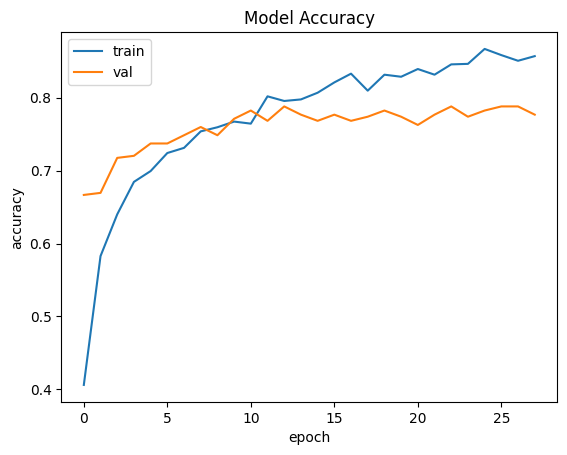

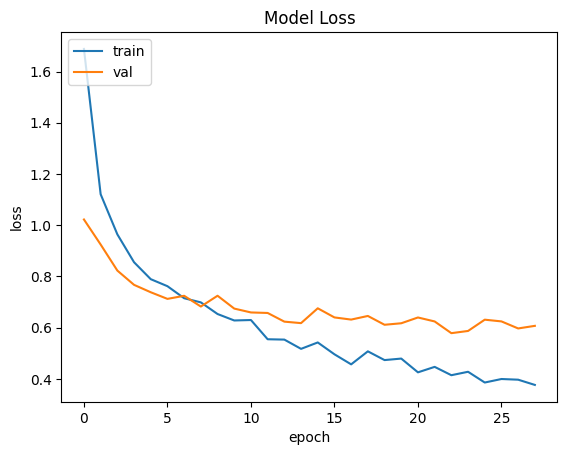

In [9]:
# Building the model

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model with data augmentation and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('densenet121_augemented.h5', save_best_only=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=50, callbacks=[early_stopping, model_checkpoint])

# Evaluating the model
model.evaluate(X_test, y_test_encoded)

# Plotting the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
# Loading the model and evaluating it on the test set
from keras.models import load_model

model = load_model('densenet121_augemented.h5')
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
predictions = model.predict(X_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 725ms/step - accuracy: 0.8515 - loss: 0.4519
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step
Test Loss: 0.5220123529434204
Test Accuracy: 0.8213456869125366


F1 Score:  0.8214747512922655
Precision:  0.8245030694600443
Recall:  0.8213457076566125
Accuracy:  0.8213457076566125


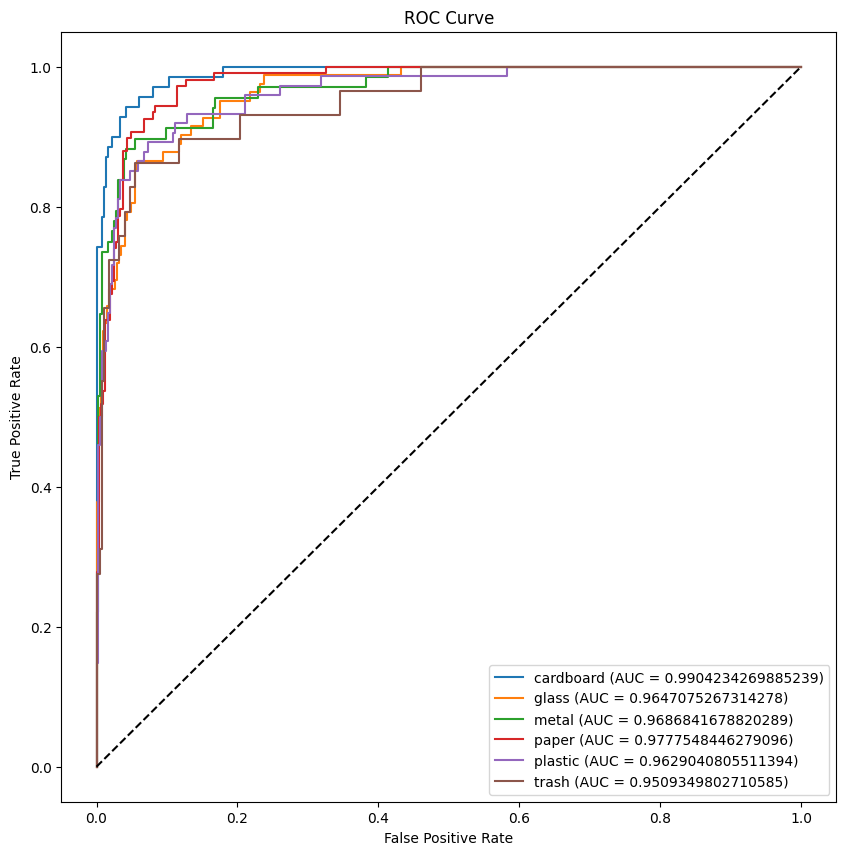

              precision    recall  f1-score   support

   cardboard       0.91      0.86      0.88        70
       glass       0.80      0.77      0.78        82
       metal       0.87      0.76      0.81        68
       paper       0.86      0.90      0.88       108
     plastic       0.73      0.84      0.78        74
       trash       0.71      0.69      0.70        29

    accuracy                           0.82       431
   macro avg       0.81      0.80      0.81       431
weighted avg       0.82      0.82      0.82       431



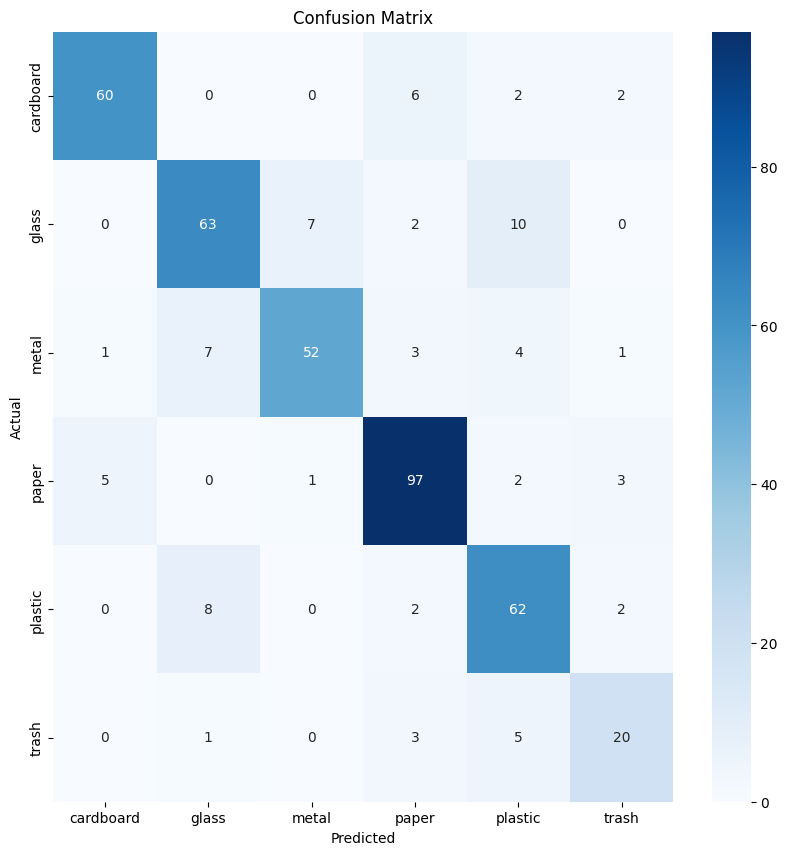

In [11]:
# Model Evaluation

# f1 score, precision, recall, accuracy, confusion matrix, classification report, and ROC curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc

# F1 Score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score: ", f1)

# Precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Precision: ", precision)

# Recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("Recall: ", recall)

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))
print("Accuracy: ", accuracy)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 10))

for i in range(6):
    plt.plot(fpr[i], tpr[i], label=classes_names[i] + ' (AUC = ' + str(roc_auc[i]) + ')')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1), target_names=classes_names))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


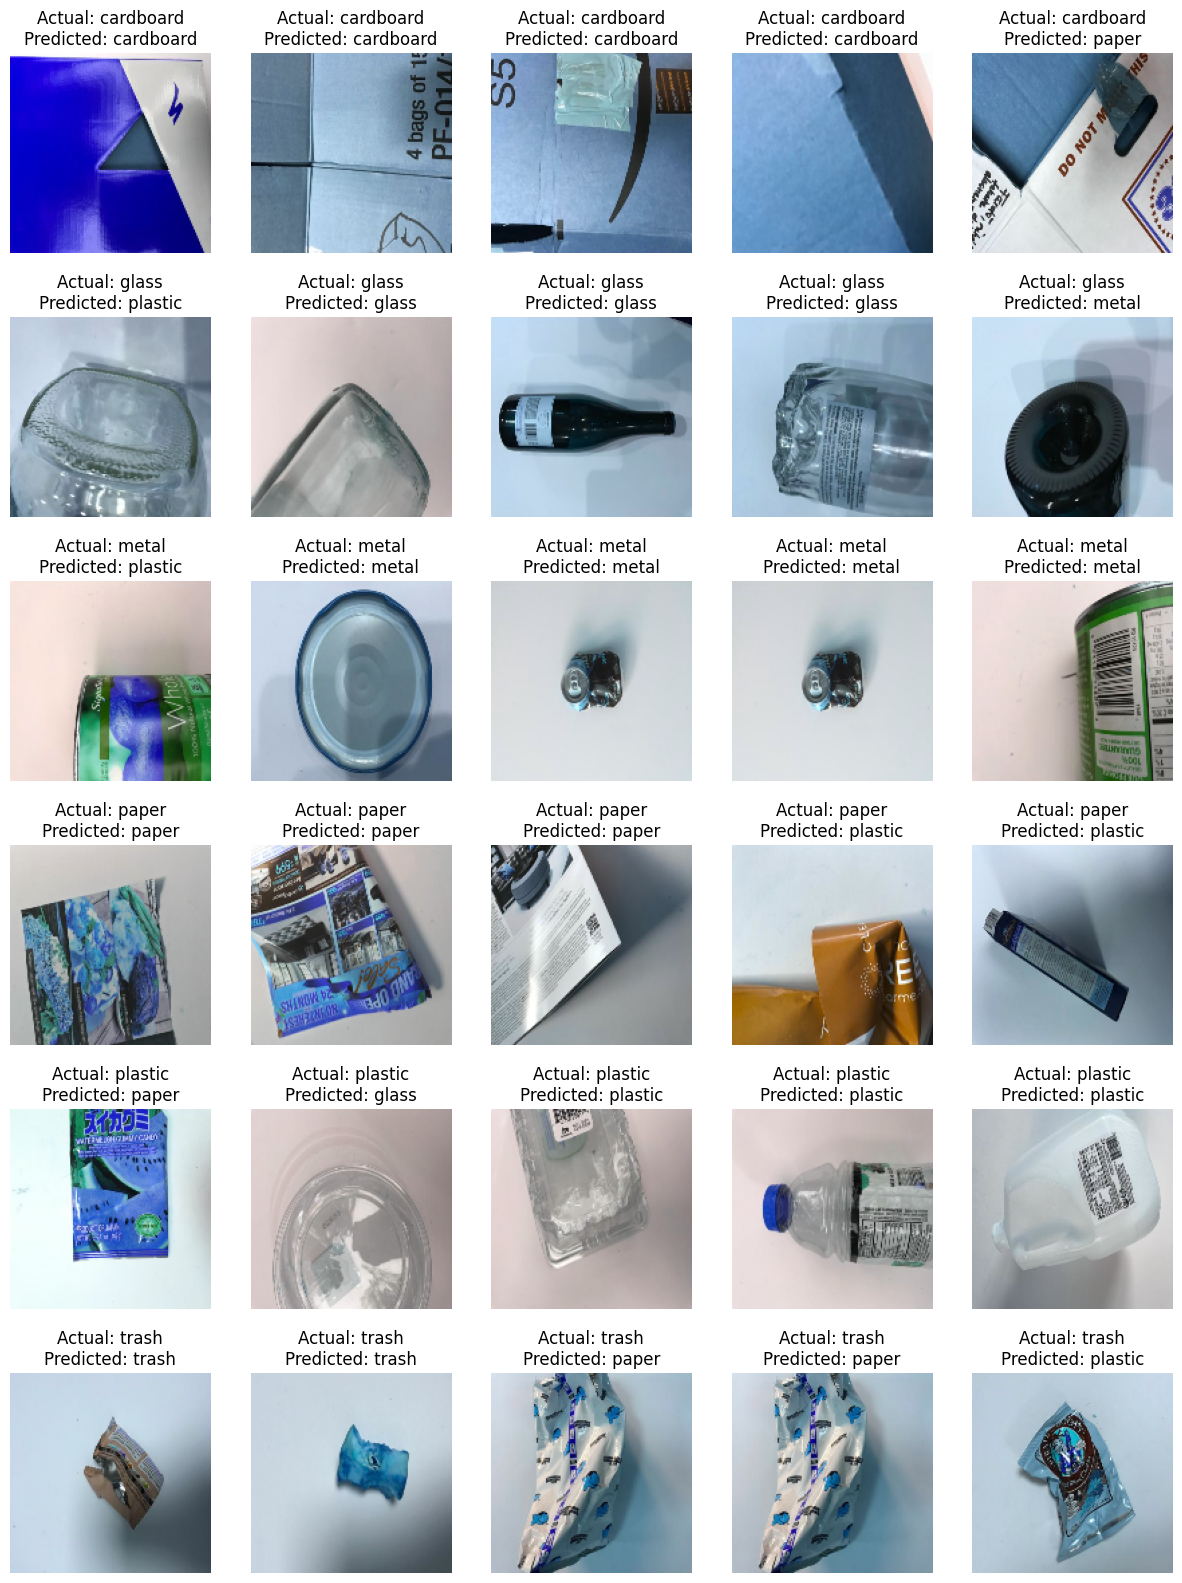

In [12]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)